###Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords  #nautral language toolkit removes unnecessary words
from nltk.stem.porter import PorterStemmer  #provides root word for a particular word
from sklearn.feature_extraction.text import TfidfVectorizer  #used to convert text into feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

###Preprocessing

In [ ]:
df=pd.read_csv('/content/train.csv.zip')

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#Since dataset is large, convert missing string to null string
dataset=df.fillna('')

In [ ]:
dataset['content']=dataset['author']+' ' + dataset['title']

In [ ]:
x=dataset.drop(columns='label', axis=1)
y=dataset['label']

In [ ]:
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ', content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word)for word in stemmed_content if word not in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
dataset['content']=dataset['content'].apply(stemming)

In [ ]:
dataset['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [ ]:
X=dataset['content'].values
Y=dataset['label'].values

In [ ]:
#converting textul data to numerical data
vectorizer=TfidfVectorizer()


vectorizer.fit(X)

X=vectorizer.transform(X)

###Splitting the data into train test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

#Logistic Regression

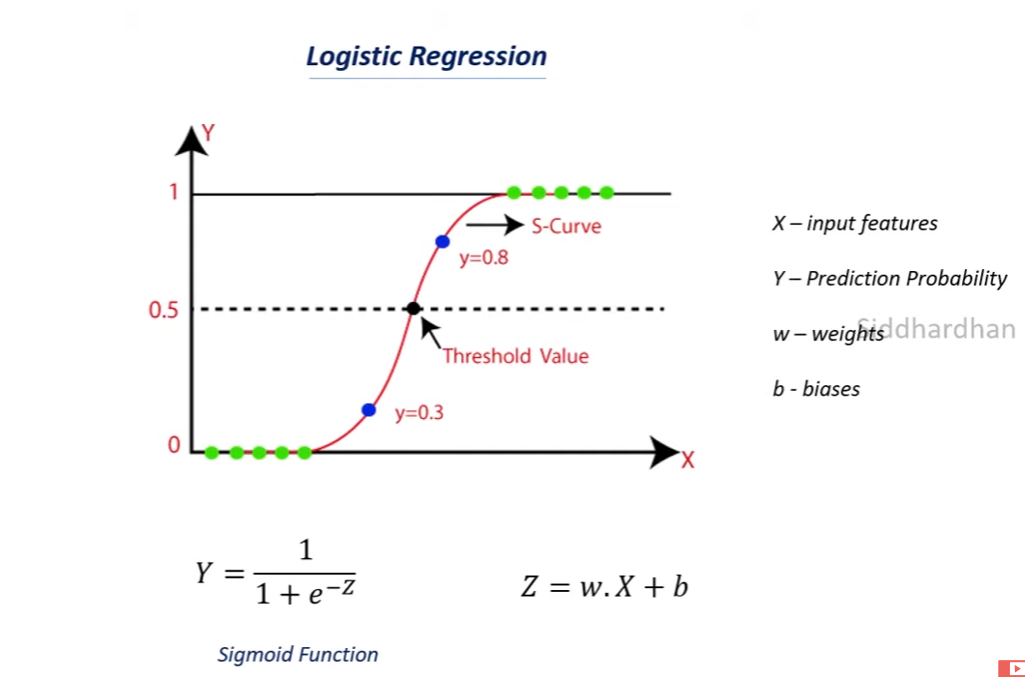

In [ ]:
model=LogisticRegression()

model.fit(x_train, y_train)

y_train_pred=model.predict(x_train)

###Evaluation

In [ ]:
train_accuracy=accuracy_score(y_train_pred, y_train)
train_accuracy

0.9865985576923076

In [ ]:
y_test_pred=model.predict(x_test)
test_accuracy=accuracy_score(y_test_pred, y_test)
test_accuracy

0.9790865384615385

###Make a Prediction

In [ ]:
x_new=x_test[8]

prediction=model.predict(x_new)

if prediction[0]==0:
  print("News is real.")
else:
  print("News is fake.")

print("News is fake." if y_test[8] else "News is real." )

News is fake.
News is fake.
